In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [30]:
# Function to process FFT for a given file
def process_fft(file_name, total_time):
    # Load the data from the Excel file
    data = pd.read_excel(file_name, sheet_name='Sheet1')
    
    # Extract signal values and remove mean
    signal = data.iloc[:, 0].values  # Assuming the signal is in the first column
    signal = signal - np.mean(signal)
    
    # Compute sampling parameters
    N = len(signal)  # Number of samples
    dt = total_time / N  # Time interval between samples
    Fs = 1 / dt  # Sampling frequency
    
    # Perform FFT
    Y = fft(signal)  # Compute the FFT
    frequencies = fftfreq(N, dt)  # Frequency bins
    Y_magnitude = np.abs(Y)  # Magnitude of FFT
    
    # Select positive frequencies only
    positive_freqs = frequencies[:N // 2]
    positive_magnitude = Y_magnitude[:N // 2]
    
    return signal, positive_freqs, positive_magnitude, dt

In [39]:
# File paths for the two signals
file1 = r'D:\Onedrive\experiments\experiments\matlab\control_systems\mpu_data_gz.xlsx'
file2 = r'D:\Onedrive\experiments\experiments\matlab\control_systems\mpu_data_gz_5Hz_LPF_100Hz_rate.xlsx' 

# Parameters
total_time = 180  # Total time in seconds

# Process both signals
signal1, freqs1, mag1, dt1 = process_fft(file1, total_time)
signal2, freqs2, mag2, dt2 = process_fft(file2, total_time)

# Generate time vectors for both signals
time1 = np.linspace(0, total_time, len(signal1))
time2 = np.linspace(0, total_time, len(signal2))

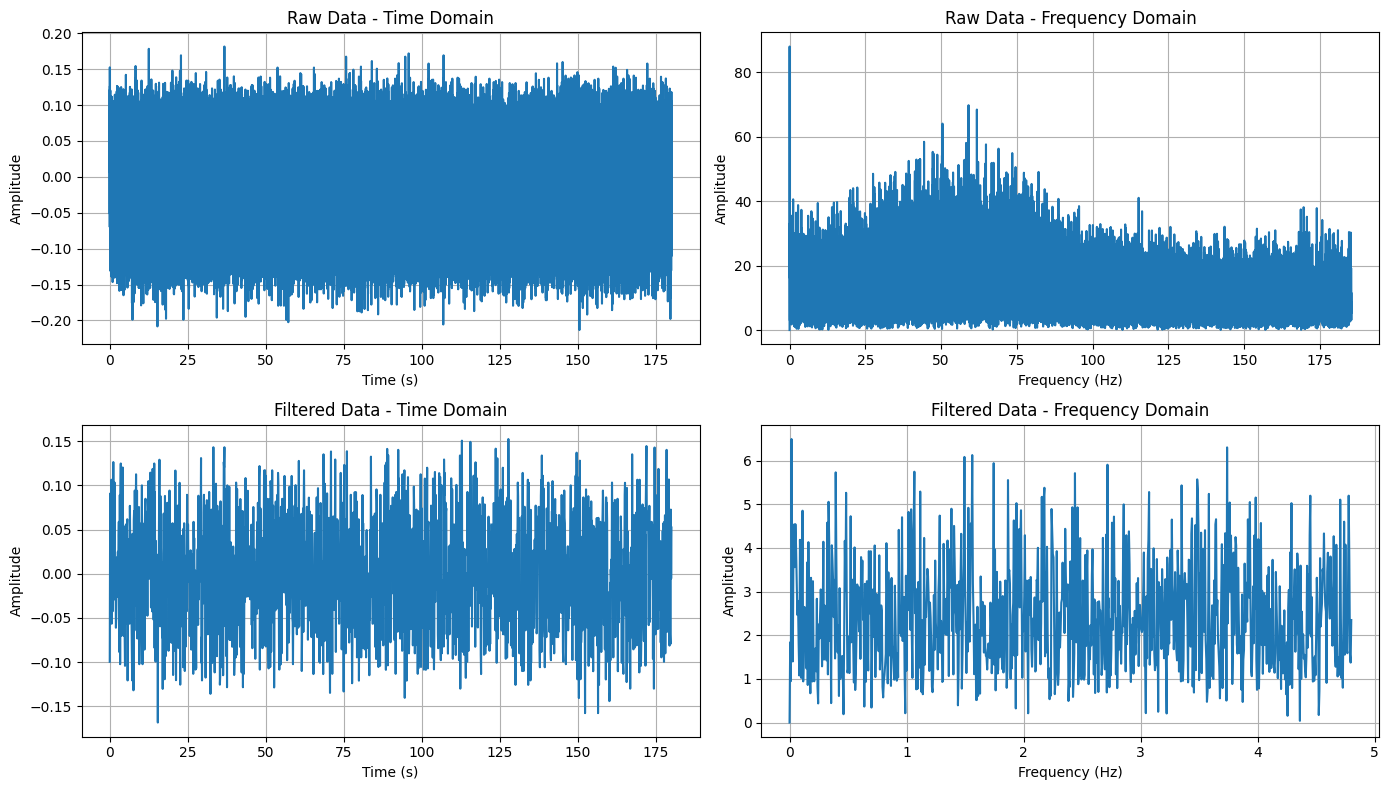

In [40]:
# Plot results for Signal 1
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
plt.plot(time1, signal1)
plt.title('Raw Data - Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(freqs1, mag1)
plt.title('Raw Data - Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot results for Signal 2
plt.subplot(2, 2, 3)
plt.plot(time2, signal2)
plt.title('Filtered Data - Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(freqs2, mag2)
plt.title('Filtered Data - Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

In [41]:
# Optional: Display dominant frequencies
dominant_freq1 = freqs1[np.argmax(mag1)]
dominant_freq2 = freqs2[np.argmax(mag2)]

print(f"Dominant Frequency of Signal 1: {dominant_freq1:.2f} Hz")
print(f"Dominant Frequency of Signal 2: {dominant_freq2:.2f} Hz")

Dominant Frequency of Signal 1: 0.02 Hz
Dominant Frequency of Signal 2: 0.02 Hz
